In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
%matplotlib inline

<div id="rmse" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" style="align:center"/> </div>
  <div style="float:left;width: 85%;"><label></label></div>
</div>


In [4]:
df= pd.read_csv('df_total.csv')

In [5]:
df.sample(1)

,Unnamed: 0,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
3524,6757,apartment,-35.434231,-58.802876,70000.0,43.0,San Miguel del Monte,San Miguel del Monte,67270.735995,1176.22133,bajo,3


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
from sklearn.model_selection import cross_validate

In [8]:
def reg_lineal_multiple(data, features):

    X = data[features]
    y = data.price_aprox_usd

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

    X = sm.add_constant(X_train)

    lm = sm.OLS(y_train, X_train).fit() 
    

    cv = cross_validate(estimator=linear_model.LinearRegression(), X=X_train, y=y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=3)


    return cv, lm

In [9]:
cv_tot, lm_tot = reg_lineal_multiple(df,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )

In [10]:
lm_tot.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          6.162e+04
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:53   Log-Likelihood:                     -9.3497e+05
No. Observations:               70758   AIC:                                  1.870e+06
Df Residuals:                   70753   BIC:                                  1.870e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1480.0385      4.503    328.688      0.000    1471.213    1488.864
lat                    1076.9199    237.590      4.533      0.000     611.244    1542.595
lon                    1264.6476    143.395      8.819      0.000     983.594    1545.701
precio_m2                87.3433      0.557    156.718      0.000      86.251      88.436
distance_obelisco        -0.0218      0.003     -8.461      0.000      -0.027      -0.017
==============================================================================
Omnibus:                    42239.647   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2141687.594
Skew:                           2.189   Prob(JB):                         0.00
Kurtosis:                      29.594   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
cv_tot

{'fit_time': array([0.02199244, 0.01699686, 0.01400924]),
 'score_time': array([0.00399661, 0.00599885, 0.00399542]),
 'test_neg_root_mean_squared_error': array([-129846.90934102, -131849.53459773, -135445.31156715]),
 'test_r2': array([0.62852189, 0.63058781, 0.61366405])}

In [12]:
cv_tot_2, lm_tot_2 = reg_lineal_multiple(df,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2'] )

In [13]:
lm_tot_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          7.693e+04
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:53   Log-Likelihood:                     -9.3501e+05
No. Observations:               70758   AIC:                                  1.870e+06
Df Residuals:                   70754   BIC:                                  1.870e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1482.5581      4.495    329.806      0.000    1473.747    1491.369
lat                     -79.7880    194.409     -0.410      0.682    -460.829     301.253
lon                    2036.5844    110.678     18.401      0.000    1819.656    2253.513
precio_m2                88.6133      0.537    165.016      0.000      87.561      89.666
==============================================================================
Omnibus:                    42014.166   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2125229.304
Skew:                           2.172   Prob(JB):                         0.00
Kurtosis:                      29.495   Cond. No.                         916.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
cv_tot_2

{'fit_time': array([0.01600075, 0.01600718, 0.01400995]),
 'score_time': array([0.00600457, 0.00599265, 0.00299644]),
 'test_neg_root_mean_squared_error': array([-130107.11851299, -132117.91489785, -135669.99954272]),
 'test_r2': array([0.62703154, 0.6290824 , 0.61238122])}

In [15]:
def error(ground_truth, prediction):

    r2 = r2_score(ground_truth, prediction)
    RMSE = mean_squared_error(ground_truth, prediction, squared= False)


    print('R2:' , round(r2, 4))
    print ('RMSE:' , round(RMSE))

    return r2, RMSE

In [16]:
X = df[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2']]
y = df.price_aprox_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [17]:
#errores en test
predictions = lm_tot_2.predict(X_test)

error(y_test, predictions)

R2: 0.6274
RMSE: 132205


(0.6273859489781655, 132204.72926813248)

In [18]:
#errores en train
predictions = lm_tot_2.predict(X_train)

error(y_train, predictions)

R2: 0.6229
RMSE: 132620


(0.6229468461959673, 132620.02513876674)

## Departamento

In [19]:
df_depto= pd.read_csv('df_depto.csv')

In [20]:
cv_depto, lm_depto = reg_lineal_multiple(df_depto,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2'] )
lm_depto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          5.221e+04
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:54   Log-Likelihood:                     -5.3735e+05
No. Observations:               41874   AIC:                                  1.075e+06
Df Residuals:                   41870   BIC:                                  1.075e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  2346.6148     11.930    196.694      0.000    2323.231    2369.998
lat                    1156.0407    181.082      6.384      0.000     801.117    1510.965
lon                    1813.5341    102.483     17.696      0.000    1612.665    2014.403
precio_m2                74.5342      0.488    152.749      0.000      73.578      75.491
==============================================================================
Omnibus:                    39038.515   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2285387.804
Skew:                           4.411   Prob(JB):                         0.00
Kurtosis:                      38.100   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
cv_depto

{'fit_time': array([0.00900197, 0.01299548, 0.0130024 ]),
 'score_time': array([0.00399947, 0.00500107, 0.00399852]),
 'test_neg_root_mean_squared_error': array([-90686.18905182, -91570.10491446, -89434.29432423]),
 'test_r2': array([0.61870272, 0.6335927 , 0.6340603 ])}

## Casas


In [22]:
df_casa= pd.read_csv('df_casa.csv')

In [23]:
cv_casa, lm_casa = reg_lineal_multiple(df_casa,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2'] )
lm_casa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          2.762e+04
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:54   Log-Likelihood:                     -3.1654e+05
No. Observations:               23469   AIC:                                  6.331e+05
Df Residuals:                   23465   BIC:                                  6.331e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1387.1782      8.799    157.654      0.000    1369.932    1404.425
lat                   -2544.2629    410.017     -6.205      0.000   -3347.923   -1740.603
lon                    3842.2153    235.175     16.338      0.000    3381.257    4303.174
precio_m2               134.0058      1.645     81.448      0.000     130.781     137.231
==============================================================================
Omnibus:                    11901.900   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           338042.362
Skew:                           1.872   Prob(JB):                         0.00
Kurtosis:                      21.212   Cond. No.                         585.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
cv_casa

{'fit_time': array([0.01099706, 0.00599766, 0.00900674]),
 'score_time': array([0.00299954, 0.00599837, 0.00300097]),
 'test_neg_root_mean_squared_error': array([-179640.93914502, -169161.88528476, -174138.30262622]),
 'test_r2': array([0.59088075, 0.59128458, 0.5937422 ])}

## Store


In [25]:
df_store = pd.read_csv('df_store.csv')

In [26]:
cv_store, lm_store = reg_lineal_multiple(df_store,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2'] )
lm_store.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              2271.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:54   Log-Likelihood:                         -28809.
No. Observations:                2113   AIC:                                  5.763e+04
Df Residuals:                    2109   BIC:                                  5.765e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1145.6218     20.430     56.075      0.000    1105.556    1185.687
lat                     163.9944   1568.439      0.105      0.917   -2911.855    3239.844
lon                    1789.7612    890.030      2.011      0.044      44.332    3535.190
precio_m2               106.7411      3.516     30.362      0.000      99.847     113.635
==============================================================================
Omnibus:                      647.523   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5025.344
Skew:                           1.225   Prob(JB):                         0.00
Kurtosis:                      10.147   Cond. No.                         931.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
cv_store

{'fit_time': array([0.00901389, 0.00598383, 0.0069778 ]),
 'score_time': array([0.0069952 , 0.00700903, 0.0050025 ]),
 'test_neg_root_mean_squared_error': array([-206900.49493298, -201572.68158073, -198370.36830473]),
 'test_r2': array([0.61854755, 0.59863054, 0.63319761])}

## PH


In [28]:
df_ph= pd.read_csv('df_ph.csv')

In [29]:
cv_ph, lm_ph = reg_lineal_multiple(df_ph,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2'] )
lm_ph.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              8575.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:55:54   Log-Likelihood:                         -40067.
No. Observations:                3300   AIC:                                  8.014e+04
Df Residuals:                    3296   BIC:                                  8.017e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1222.1905     19.473     62.765      0.000    1184.011    1260.370
lat                     770.9124    383.361      2.011      0.044      19.262    1522.562
lon                     417.8127    228.437      1.829      0.067     -30.080     865.705
precio_m2                55.6249      1.345     41.353      0.000      52.988      58.262
==============================================================================
Omnibus:                      463.812   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4133.296
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                       8.433   Cond. No.                         898.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
cv_ph

{'fit_time': array([0.00599027, 0.00399947, 0.00500083]),
 'score_time': array([0.00600076, 0.00499845, 0.00400233]),
 'test_neg_root_mean_squared_error': array([-45055.59766148, -46121.08302842, -45211.19636071]),
 'test_r2': array([0.60354689, 0.5837611 , 0.59441566])}

In [31]:
rmse_dict = {'RMSE_ph' : cv_ph['test_neg_root_mean_squared_error'] , 'RMSE_casa':cv_casa['test_neg_root_mean_squared_error'], 'RMSE_depto':cv_depto['test_neg_root_mean_squared_error'], 'RMSE_store':cv_store['test_neg_root_mean_squared_error'], 'RMSE':cv_tot_2['test_neg_root_mean_squared_error']}

In [80]:
df_plot = pd.DataFrame(rmse_dict)

In [81]:
df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] = df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] * -1

In [82]:
df_plot['model'] = 'multivariable'

<AxesSubplot:>

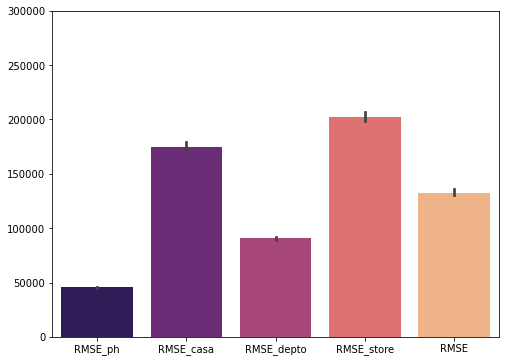

In [35]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 300000)
sns.barplot(data=df_plot, palette= 'magma')

In [36]:
df_RMSE_lineal = pd.read_csv('./data/RMSE_lineal_simple.csv')

In [83]:
df_RMSE_lineal['model'] ='lineal'

In [84]:
df_plot = pd.concat([df_RMSE_lineal,df_plot])

In [85]:
df_plot = pd.melt(df_plot, id_vars=['model'])

In [86]:
df_plot.sample(2)

,model,variable,value
26,lineal,RMSE,159940.433481
9,multivariable,RMSE_casa,179640.939145


<AxesSubplot:xlabel='variable', ylabel='value'>

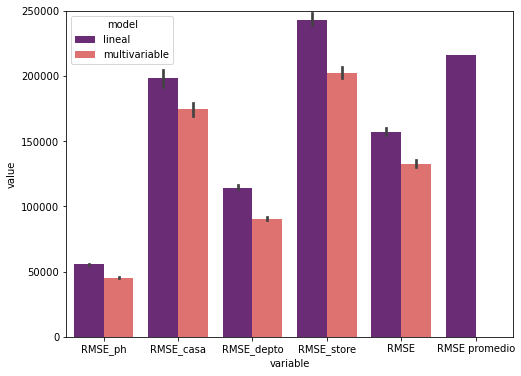

In [87]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 250000)
sns.barplot(data= df_plot, x ='variable', y= 'value', hue= 'model', palette= 'magma')

### Regularización

#### L2 = Regularización con Ridge

In [42]:
# Regularización con Ridge

from sklearn.preprocessing import StandardScaler

X = df[['lat', 'lon', 'surface_covered_in_m2', 'distance_obelisco', 'precio_m2']]

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

y = df['price_aprox_usd']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 117)

model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0, 20, 50, 100], 
                                   fit_intercept=True, scoring='neg_root_mean_squared_error', normalize=False, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)

print('El mejor valor de  𝜆  es:')
print(model_fit_ridge_cv.alpha_)
print('El valor de  𝑅MSE  en train es:')
print(model_fit_ridge_cv.best_score_)

El mejor valor de  𝜆  es:
10.0
El valor de  𝑅MSE  en train es:
-132403.89670895878


In [44]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False)
model_fit_ridge = model_ridge.fit(X_train, y_train)
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))

[ -1791.7478231  -15079.87542545 168647.89079284 -21094.95631564
  83941.60468743]
217501.01338899572
0.6269125760161969


In [45]:
pred= model_fit_ridge.predict(X_test)

In [46]:
r2, RMSE_ridge = error(y_test, pred )

R2: 0.6219
RMSE: 131919


In [88]:
df_plot = df_plot.append({'model': 'Ridge' ,'variable': 'RMSE',	'value' : RMSE_ridge}, ignore_index=True)

In [48]:
df_plot

,model,variable,value
0,lineal,RMSE_ph,56099.575297
1,lineal,RMSE_ph,55258.360912
2,lineal,RMSE_ph,56152.490413
3,multivariable,RMSE_ph,45055.597661
4,multivariable,RMSE_ph,46121.083028
5,multivariable,RMSE_ph,45211.196361
6,lineal,RMSE_casa,204323.844514
7,lineal,RMSE_casa,191733.356984
8,lineal,RMSE_casa,199166.128193
9,multivariable,RMSE_casa,179640.939145


<AxesSubplot:xlabel='variable', ylabel='value'>

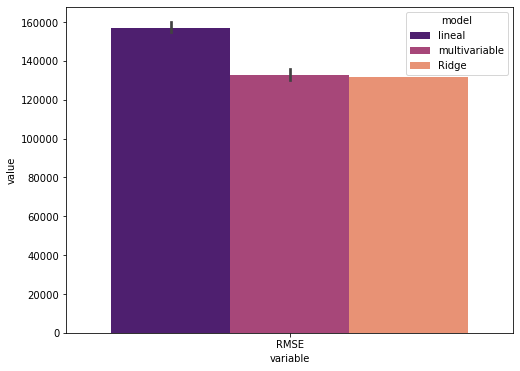

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'variable', y= 'value', data= df_plot[df_plot.variable == 'RMSE'], hue= 'model', palette='magma')

## XGBoost

In [55]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [56]:
X= df[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2', 'property_type']]
X_encoded = pd.get_dummies(X, columns=['property_type'])
y = df.price_aprox_usd
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=7)

In [57]:
rg_xgb = xgb.XGBRegressor( learning_rate=0.5, max_depth=6, reg_lambda=5)
rg_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:185626.67188
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:134571.76562
[2]	validation_0-rmse:115558.74219
[3]	validation_0-rmse:108263.25781
[4]	validation_0-rmse:104129.22656
[5]	validation_0-rmse:101569.50000
[6]	validation_0-rmse:100459.85156
[7]	validation_0-rmse:97531.84375
[8]	validation_0-rmse:97240.10938
[9]	validation_0-rmse:97235.67188
[10]	validation_0-rmse:96760.28125
[11]	validation_0-rmse:96668.28125
[12]	validation_0-rmse:96506.27344
[13]	validation_0-rmse:96136.12500
[14]	validation_0-rmse:96104.71094
[15]	validation_0-rmse:96099.50781
[16]	validation_0-rmse:95821.50000
[17]	validation_0-rmse:95619.37500
[18]	validation_0-rmse:95550.75000
[19]	validation_0-rmse:95392.75000
[20]	validation_0-rmse:95404.19531
[21]	validation_0-rmse:95040.86719
[22]	validation_0-rmse:94863.51562
[23]	validation_0-rmse:94813.63281
[24]	validation_0-rmse:94514.32812
[25]	validation_0-rmse:94510.07812
[26]	validation_0-rmse:94461

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
pred = rg_xgb.predict(X_test)

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'max_depth': [4,5,6],
    'learning_rate': [0.9, 0.7,0.5,0,3],
    'gamma':[0, 0.25, 1],
    'reg_lambda':[1.0, 10, 30],
    'scale_pos_weight':[1,3,5]}
   

In [ ]:
# param_grid = {
#     'max_depth': [6, 7],
#     'learning_rate': [0.9, 0.7,0.5,0,3],
#     'reg_lambda':[5,7,10]}

In [61]:
optimal_params= GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid,
    scoring= 'neg_root_mean_squared_error',
    verbose=2,
    n_jobs=10,
    cv=3)


In [62]:
optimal_params.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   31.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed: 12.5min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed: 19.6min
[Parallel(n_jobs=10)]: Done 1215 out of 1215 | elapsed: 23.7min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [63]:
print(optimal_params.best_score_)
print(optimal_params.best_params_)

-94112.44377877087
{'gamma': 0, 'learning_rate': 0.5, 'max_depth': 6, 'reg_lambda': 30, 'scale_pos_weight': 1}


In [68]:
rg_xgb.feature_importances_

array([0.49675158, 0.05939185, 0.05519441, 0.30076623, 0.01644962,
       0.01816799, 0.03207456, 0.02120376], dtype=float32)

<BarContainer object of 8 artists>

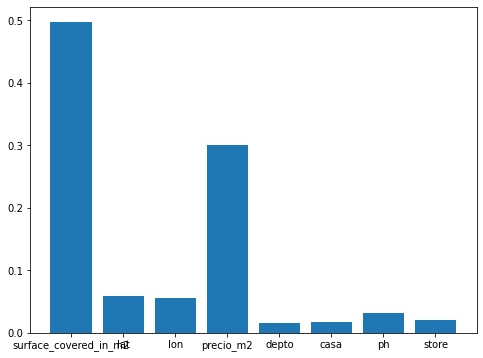

In [79]:
plt.figure(figsize=(8, 6))
plt.bar( ['surface_covered_in_m2', 'lat', 'lon', 'precio_m2', 'depto', 'casa', 'ph', 'store'],rg_xgb.feature_importances_)

In [89]:
df_plot = df_plot.append({'model': 'XGBoost' ,'variable': 'RMSE',	'value' : (-optimal_params.best_score_)}, ignore_index=True)

<AxesSubplot:xlabel='model', ylabel='value'>

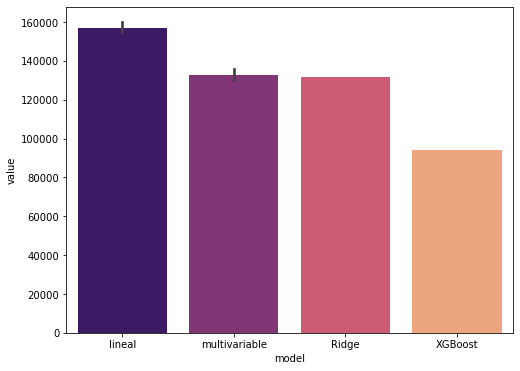

In [91]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'model', y= 'value', data= df_plot[df_plot.variable == 'RMSE'], palette='magma')